In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_imgs.shape

(60000, 28, 28)

In [ ]:
# if backend.image_data_format() == 'channels_first':
#   train_imgs = train_imgs.reshape(train_imgs.shape[0], 1, 28, 28)
#   test_imgs = test.reshape(test_imgs.shape[0], 1, 28, 28)
#   input_shape = (1, 28, 28)

# else:
#   train_imgs = train_imgs.reshape(train_imgs.shape[0], 28, 28, 1)
#   test_imgs = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)
#   input_shape = (28, 28, 1)

train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')

# normalize to range 0-1
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

print (train_imgs.shape)
print (test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# convert class vectors to binary class matrices
# train_labels = to_categorical(train_labels, 10)
# test_labels = to_categorical(test_labels, 10)

In [ ]:
# create model
model = Sequential()
# conv layers
# model.add(Conv2D(filters = 16, kernel_size = 3, activation= 'relu', input_shape = (28, 28, 1)))
# model.add(MaxPool2D(pool_size= 2))
model.add(Conv2D(filters = 32, kernel_size = 3, activation= 'relu', input_shape= (28, 28, 1)))
model.add(MaxPool2D(pool_size= 2))
model.add(Conv2D(filters = 64, kernel_size = 3, activation= 'relu'))
model.add(MaxPool2D(pool_size= 2))

# hidden layers
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 200)              

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])
model.fit(train_imgs, train_labels, batch_size = 64, epochs= 10, validation_data=(test_imgs, test_labels))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4753 - accuracy: 0.8247 - val_loss: 0.4185 - val_accuracy: 0.8520
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3051 - accuracy: 0.8883 - val_loss: 0.3394 - val_accuracy: 0.8801
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2565 - accuracy: 0.9054 - val_loss: 0.2897 - val_accuracy: 0.8927
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2268 - accuracy: 0.9172 - val_loss: 0.2974 - val_accuracy: 0.8883
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2042 - accuracy: 0.9248 - val_loss: 0.2573 - val_accuracy: 0.9071
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1850 - accuracy: 0.9319 - val_loss: 0.2624 - val_accuracy: 0.9053
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1677 - accuracy: 0.9378 - val_loss: 0.2480 - val_accuracy: 0.9132
Epoch 

In [ ]:
score = model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.9095


In [ ]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# make prediction
pred = model.predict(test_imgs)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(labels[0])

T-shirt/top


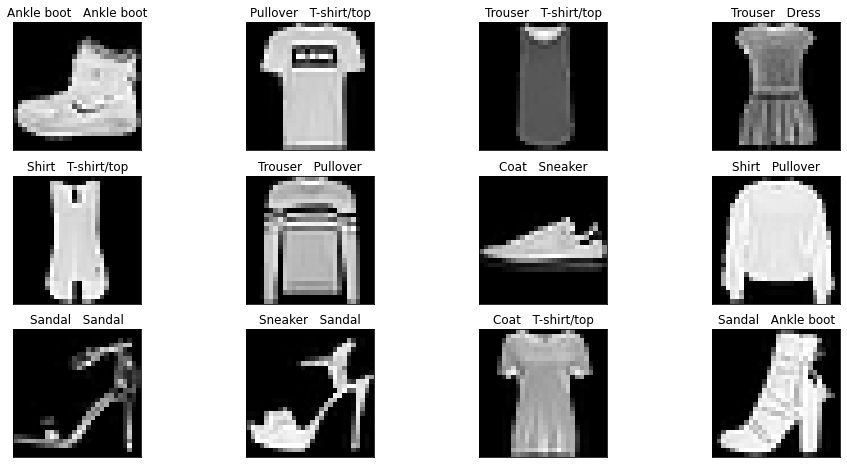

In [ ]:
fig = plt.figure(figsize=(16,8))
num_of_images = 12
for i in range(num_of_images):
  ax = fig.add_subplot(3,4, i+1, xticks=[],yticks=[])
  ax.imshow(train_imgs[i], cmap='gray')
  ax.set_title(str(train_labels[i]))
  classes_pred = labels[np.argmax(pred[i])]
  classes_true = labels[train_labels[i]]
  ax.set_title(f'{classes_pred}   {classes_true}')